Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       105
          1       0.84      0.64      0.72        74

avg / total       0.80      0.80      0.79       179


Confusion Matrix:
 [[96  9]
 [27 47]]


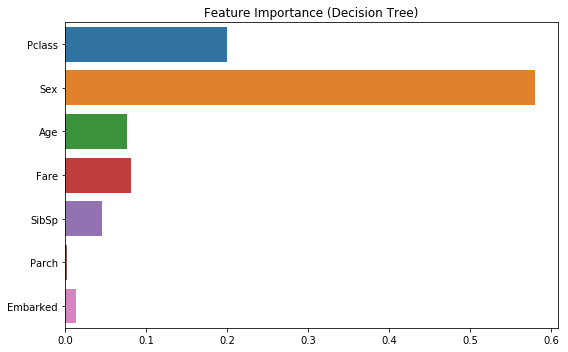

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned Titanic dataset
df = pd.read_csv("train_clean.csv")

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df['Sex'] = df['Sex'].fillna('male')

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'].astype(str))
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str))

# Define features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = df[features]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()